In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os

os.makedirs("data", exist_ok=True)

# URL trang báo
url = "https://vnexpress.net/"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Lấy tiêu đề, link, tóm tắt
articles = []
for item in soup.find_all("article", class_="item-news"):
    title_tag = item.find("h3", class_="title-news")
    if not title_tag:
        continue
    title = title_tag.get_text(strip=True)
    link = title_tag.a["href"] if title_tag.a else None
    summary = item.find("p", class_="description").get_text(strip=True) if item.find("p", class_="description") else None
    articles.append({"title": title, "link": link, "summary": summary})

# Lưu ra CSV
df_articles = pd.DataFrame(articles)
df_articles.to_csv("data/baiviet.csv", index=False, encoding="utf-8-sig")
print("✅ Đã lưu dữ liệu bài viết vào data/baiviet.csv")

df_articles.head()


✅ Đã lưu dữ liệu bài viết vào data/baiviet.csv


,title,link,summary
0,Tổng Bí thư: Lực lượng công an tiếp tục gương ...,https://vnexpress.net/tong-bi-thu-luc-luong-co...,Hà NộiTổng Bí thư Tô Lâm yêu cầu công an phải ...
1,Hoàng Hường và pháp lý với KOL,https://vnexpress.net/hoang-huong-va-phap-ly-v...,"Người thân ở quê gọi cho tôi, nói: 'Đang xem t..."
2,"Trung Quốc phát cảnh báo cam, hủy loạt chuyến ...",https://vnexpress.net/trung-quoc-phat-canh-bao...,"Trung Quốc ban hành cảnh báo màu cam, mức thứ ..."
3,Đường đi của bão Matmo khi vào vùng biển Bắc Bộ,https://vnexpress.net/duong-di-cua-bao-matmo-k...,Bão Matmo sau khi qua bán đảo Lôi Châu (Trung ...
4,Hoàng Hường - người vừa bị khởi tố là ai?,https://vnexpress.net/hoang-huong-nguoi-vua-bi...,"Hà NộiTrước khi bị khởi tố, Hoàng Hường là gươ..."


✅ Đã lưu dữ liệu thời tiết vào data/weather.csv và data/weather.json


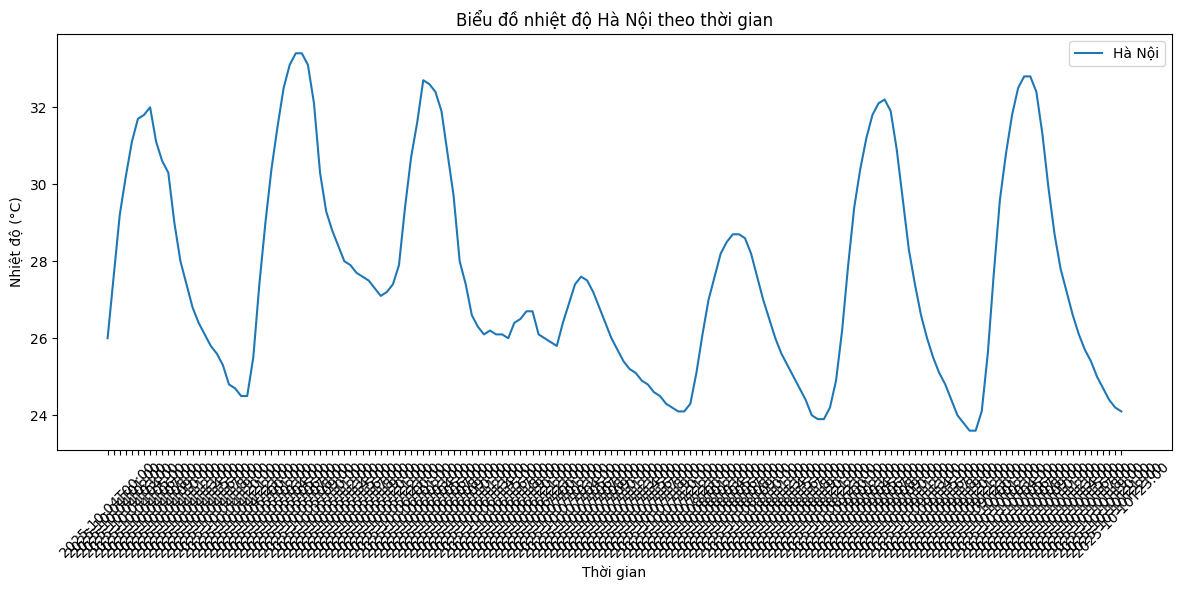

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

url = "https://api.open-meteo.com/v1/forecast"

# Các thành phố cần lấy
cities = {
    "Hanoi": (21.0285, 105.8542),
    "HCM": (10.7769, 106.7009),
    "Danang": (16.0471, 108.2068)
}

all_data = []

for city, (lat, lon) in cities.items():
    params = {
        "latitude": lat,
        "longitude": lon,
        "hourly": "temperature_2m,relativehumidity_2m,windspeed_10m"
    }
    response = requests.get(url, params=params)
    data = response.json()
    df = pd.DataFrame({
        "time": data["hourly"]["time"],
        "temperature": data["hourly"]["temperature_2m"],
        "humidity": data["hourly"]["relativehumidity_2m"],
        "windspeed": data["hourly"]["windspeed_10m"]
    })
    df["city"] = city
    all_data.append(df)

# Gộp dữ liệu
df_weather = pd.concat(all_data, ignore_index=True)
df_weather.to_csv("data/weather.csv", index=False, encoding="utf-8")
df_weather.to_json("data/weather.json", orient="records", force_ascii=False)
print("✅ Đã lưu dữ liệu thời tiết vào data/weather.csv và data/weather.json")

# Vẽ biểu đồ nhiệt độ của Hà Nội
df_hanoi = df_weather[df_weather["city"] == "Hanoi"]
plt.figure(figsize=(12,6))
plt.plot(df_hanoi["time"], df_hanoi["temperature"], label="Hà Nội")
plt.xticks(rotation=45)
plt.xlabel("Thời gian")
plt.ylabel("Nhiệt độ (°C)")
plt.title("Biểu đồ nhiệt độ Hà Nội theo thời gian")
plt.legend()
plt.tight_layout()
plt.savefig("outputs/temperature_plot.png")
plt.show()


In [ ]:
import requests, time, datetime, pandas as pd

os.makedirs("data", exist_ok=True)

URL = "https://api.coingecko.com/api/v3/simple/price"
COINS = ["bitcoin", "ethereum", "dogecoin"]
PARAMS = {"ids": ",".join(COINS), "vs_currencies": "usd"}
HEADERS = {"User-Agent": "Mozilla/5.0"}

def fetch_prices():
    r = requests.get(URL, params=PARAMS, headers=HEADERS, timeout=10)
    r.raise_for_status()
    return r.json()

# Tạo file CSV nếu chưa có
csv_file = "data/bitcoin_price.csv"
if not os.path.exists(csv_file):
    pd.DataFrame(columns=["time", "coin", "price"]).to_csv(csv_file, index=False, encoding="utf-8")

print("⏳ Bắt đầu theo dõi giá coin... (Nhấn Ctrl+C để dừng)")
while True:
    try:
        data = fetch_prices()
        ts = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        rows = []
        for coin in COINS:
            price = data[coin]["usd"]
            print(f"[{ts}] {coin.upper()}: {price} USD")
            rows.append({"time": ts, "coin": coin, "price": price})

        # Ghi ra CSV
        df_new = pd.DataFrame(rows)
        df_new.to_csv(csv_file, mode="a", header=False, index=False, encoding="utf-8")

    except Exception as e:
        print("❌ Lỗi:", e)

    time.sleep(30) 


⏳ Bắt đầu theo dõi giá coin... (Nhấn Ctrl+C để dừng)
[2025-10-04 16:40:58] BITCOIN: 122375 USD
[2025-10-04 16:40:58] ETHEREUM: 4497.63 USD
[2025-10-04 16:40:58] DOGECOIN: 0.252483 USD
